# Titanic survival prediction

 1. In this task we have to build a model and predict the survival rate of the passengers.
 2. The dataset used for this project contains information about individual passengers, such as their age, gender, ticket class, fare, cabin, and whether or not they survived

In [1]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

## Loading the Data

In [2]:
titanic_data=pd.read_csv('tested.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
#shape of the data(number of rows and columns)
titanic_data.shape

(418, 12)

In [4]:
#breif information about the data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
#checking the number of nulll values present in the data
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
#we can drop the cabin column as more than 75% of its data is null values which is not good for the data 
titanic_data=titanic_data.drop('Cabin',axis=1)

In [7]:
#shape of the data
titanic_data.shape

(418, 11)

In [8]:
#calculate the statistical data about the data frame 
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
#number of people who survived in titanic
titanic_data['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

 * 0 Represent the person did not survived
 * 1 Represent the person survived

<Axes: xlabel='Survived', ylabel='count'>

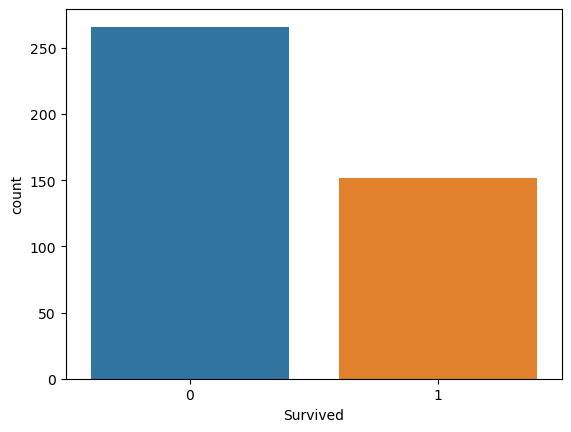

In [10]:
#countplot represent the total no of people survived and and did not survived 
sns.countplot(titanic_data,x='Survived')

<Axes: xlabel='Sex', ylabel='count'>

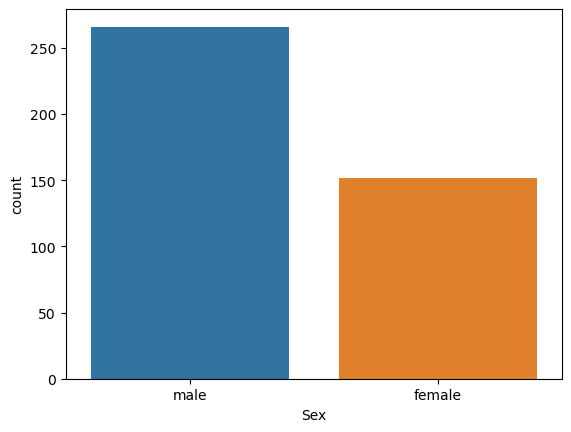

In [11]:
#represent the no of male and female passengers on board
sns.countplot(titanic_data,x='Sex')

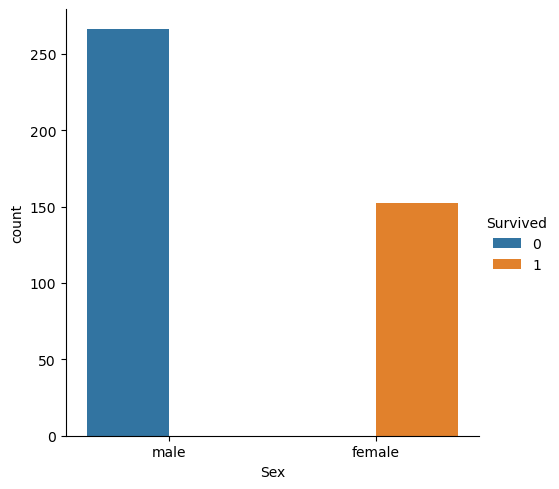

In [12]:
#represnet how many male and female passengers survived
sns.catplot(titanic_data,x='Sex',hue='Survived',kind='count')

### With the above graph we can say that we have the data of passengers in which all the females survived and males did not survived

In [13]:
#Pclass is the Socio-Economic Class in which they were travelling
titanic_data['Pclass'].value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

<Axes: xlabel='Pclass', ylabel='count'>

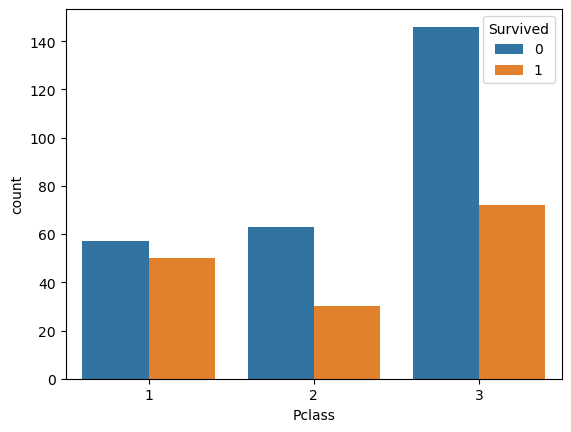

In [14]:
#represent the no of passengers survived and did not survived in each Pclass
sns.countplot(titanic_data,x='Pclass',hue='Survived')

#### We can see that most of the passengers who did not survived belonged to Pclass 3 which was the lowest class

<Axes: xlabel='SibSp', ylabel='count'>

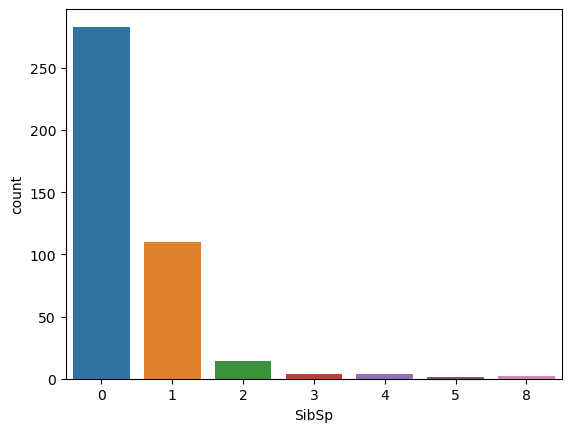

In [15]:
#represent the no of siblings and apouses aboard 
sns.countplot(titanic_data,x='SibSp')

<Axes: xlabel='Parch', ylabel='count'>

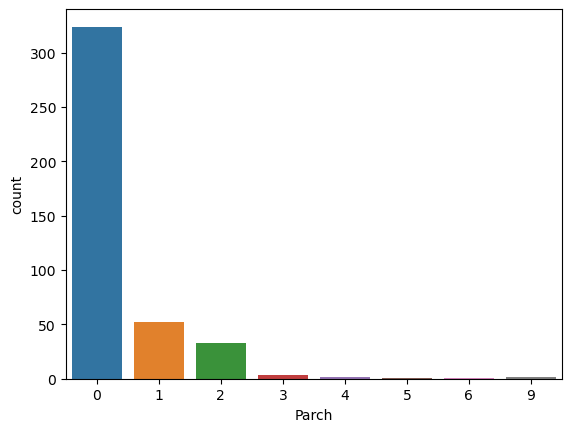

In [16]:
#represent the no of parents ans children aboard
sns.countplot(titanic_data,x='Parch')

#### We can say that not may Siblings and Parent children were aboard on the Titanic

<Axes: xlabel='Embarked', ylabel='count'>

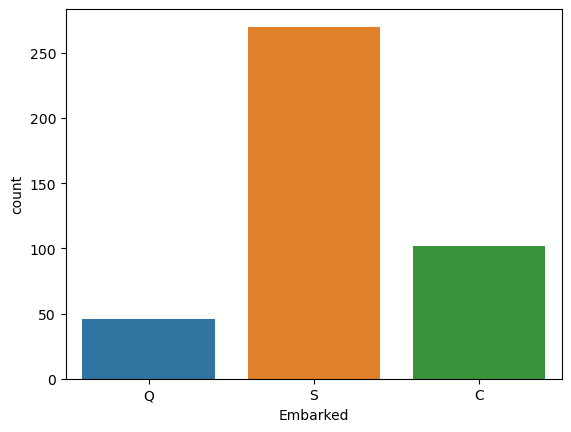

In [17]:
# represnt the places passengers boarded from
sns.countplot(titanic_data,x='Embarked')

#### The places are
* Q  Queensland
* S  Southampton
* C  Cherbourg

# Data Cleaning

In [18]:
#columsn of the dataset
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

#### we don't need the columns PassengerId, Name, Ticket.

In [19]:
#droping the unwanted columns
titanic_data=titanic_data.drop(['Name','PassengerId','Ticket'],axis=1)

In [20]:
titanic_data.shape

(418, 8)

In [21]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


In [22]:
# We will now change the categorical values into numerical values 
titanic_data.replace({'Sex':{'male':0,'female':1},'Embarked':{'Q':0,'S':1,'C':2}},inplace=True)

In [23]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    int64  
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      417 non-null    float64
 7   Embarked  418 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 26.2 KB


#### Age column has the most null values so we will fill the null values with the average of Age of their respective Pclass

<Axes: xlabel='Pclass', ylabel='Age'>

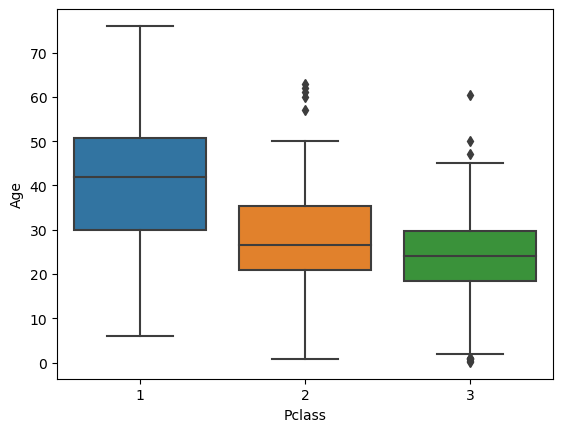

In [24]:
sns.boxplot(titanic_data,x='Pclass',y='Age')

In [25]:
titanic_data.groupby('Pclass')['Age'].mean()

Pclass
1    40.918367
2    28.777500
3    24.027945
Name: Age, dtype: float64

In [26]:
#filling the null values
titanic_data['Age']=titanic_data['Age'].fillna(titanic_data.groupby('Pclass')['Age'].transform('mean'))

In [27]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    int64  
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      417 non-null    float64
 7   Embarked  418 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 26.2 KB


In [28]:
titanic_data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [29]:
#now we have a null value in the column Fare so we will drop that row as it is just about 0.002% of the data
titanic_data.dropna(axis=0,inplace=True)

In [30]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  417 non-null    int64  
 1   Pclass    417 non-null    int64  
 2   Sex       417 non-null    int64  
 3   Age       417 non-null    float64
 4   SibSp     417 non-null    int64  
 5   Parch     417 non-null    int64  
 6   Fare      417 non-null    float64
 7   Embarked  417 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 29.3 KB


# Logistic Regression

In [31]:
#seperating the dependent and independent data
x=titanic_data.drop('Survived',axis=1)
y=titanic_data['Survived']

In [32]:
x.shape

(417, 7)

In [33]:
y.shape

(417,)

In [34]:
#splitting the data in training and testing format
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.3)

In [35]:
x_train.shape

(291, 7)

In [36]:
x_test.shape

(126, 7)

In [37]:
y_train.shape

(291,)

In [38]:
y_test.shape

(126,)

In [39]:
#Logistic Regression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [40]:
#checking the accuracy of the model
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0], dtype=int64)

In [41]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[80  0]
 [ 0 46]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       1.00      1.00      1.00        46

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



In [42]:
model.coef_

array([[-3.86728709e-02,  6.07763041e+00,  9.08730987e-04,
         1.92981429e-02,  9.09658352e-02,  4.11665039e-03,
        -1.99650917e-01]])

In [43]:
x.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [44]:
pd.DataFrame(model.coef_[0],index=x.columns)

,0
Pclass,-0.038673
Sex,6.077630
Age,0.000909
SibSp,0.019298
Parch,0.090966
Fare,0.004117
Embarked,-0.199651


In [45]:
#accuracy on traing data
y_pre_train=model.predict(x_train)
y_pre_train

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1], dtype=int64)

In [46]:
print(confusion_matrix(y_train,y_pre_train))
print(classification_report(y_train,y_pre_train))

[[185   0]
 [  0 106]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       185
           1       1.00      1.00      1.00       106

    accuracy                           1.00       291
   macro avg       1.00      1.00      1.00       291
weighted avg       1.00      1.00      1.00       291

